In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('CSV_Matrix_2.0_Group_B_dataset.xlsx', sheet_name='Deliveries', header=3)

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df = df.fillna(0)
df.head()

,match_id,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,1,1,0.1,Afghanistan,England,Rahmanullah Gurbaz,Ibrahim Zadran,RJW Topley,0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1,0.2,Afghanistan,England,Rahmanullah Gurbaz,Ibrahim Zadran,RJW Topley,6,0.0,0.0,0.0,0.0,0.0,0,0
2,1,1,0.3,Afghanistan,England,Rahmanullah Gurbaz,Ibrahim Zadran,RJW Topley,1,0.0,0.0,0.0,0.0,0.0,0,0
3,1,1,0.4,Afghanistan,England,Ibrahim Zadran,Rahmanullah Gurbaz,RJW Topley,1,0.0,0.0,0.0,0.0,0.0,0,0
4,1,1,0.5,Afghanistan,England,Rahmanullah Gurbaz,Ibrahim Zadran,RJW Topley,4,0.0,0.0,0.0,0.0,0.0,0,0


In [32]:
powerplay_df = df[(df['ball'] >= 0.1) & (df['ball'] <= 9.6)]
batsman_stats = powerplay_df.groupby(['striker', 'batting_team']).agg(matches_played=('match_id', pd.Series.nunique), total_runs=('runs_off_bat', 'sum')).reset_index()

newdf = batsman_stats.sort_values(by='total_runs', ascending=False).head(5)
newdf = newdf.rename(columns={'striker': 'batsman','batting_team': 'country'})
newdf

,batsman,country,matches_played,total_runs
10,DA Warner,Australia,11,397
45,RG Sharma,India,11,260
24,JM Bairstow,England,10,218
19,Ibrahim Zadran,Afghanistan,9,212
8,C Green,Australia,9,201


In [34]:
powerplay_df = df[(df['ball'] >= 0.1) & (df['ball'] <= 9.6)]
wickets_df = powerplay_df[powerplay_df['wicket_type'] != 0]
bowler_stats = wickets_df.groupby(['bowler', 'bowling_team']).agg(matches_played=('match_id', pd.Series.nunique), wickets_taken=('wicket_type', 'count')).reset_index()

topbowlers_df = bowler_stats.sort_values(by='wickets_taken', ascending=False).head(5)
topbowlers_df = topbowlers_df.rename(columns={'bowler': 'bowler_name','bowling_team': 'country'})
topbowlers_df

,bowler_name,country,matches_played,wickets_taken
31,MS Chapman,New Zealand,7,12
34,Mustafizur Rahman,Bangladesh,6,9
1,A Zampa,Australia,6,9
16,JJ Bumrah,India,5,8
30,MP Stoinis,Australia,5,7


In [35]:
import matplotlib.pyplot as plt

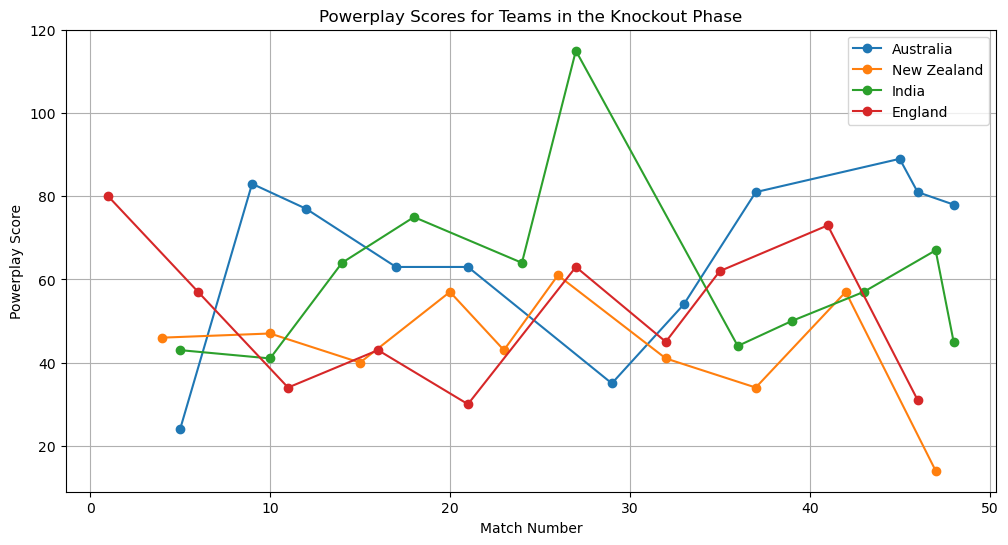

In [36]:
knockout_teams = ['Australia', 'New Zealand', 'India', 'England'] #last 3 matches in the sheet= Matches
powerplay_df = df[(df['ball'] >= 0.1) & (df['ball'] <= 9.6)]
knockout_powerplay_df = powerplay_df[powerplay_df['batting_team'].isin(knockout_teams)]

#total powerplay score for each match and team
powerplay_scores = knockout_powerplay_df.groupby(['match_id', 'batting_team']).agg(
    powerplay_runs=('runs_off_bat', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))

for team in knockout_teams:
    team_data = powerplay_scores[powerplay_scores['batting_team'] == team]
    plt.plot(team_data['match_id'], team_data['powerplay_runs'], marker='o', label=team)

plt.title('Powerplay Scores for Teams in the Knockout Phase')
plt.xlabel('Match Number')
plt.ylabel('Powerplay Score')
plt.legend()
plt.grid(True)
plt.show()